# 데이터 전처리, 분석 예제

In [1]:
import pandas as pd

price_2015 = pd.read_csv('전국_평균_분양가격(2013년_9월부터_2015년_8월까지).csv', encoding='cp949')
price_2019 = pd.read_csv('주택도시보증공사_전국_평균_분양가격(2019년_12월).csv', encoding='cp949')

price_2015, price_2015.info(), price_2019, price_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

(    지역  2013년12월  2014년1월  2014년2월  2014년3월  2014년4월  2014년5월  2014년6월  \
 0   서울     18189    17925    17925    18016    18098    19446    18867   
 1   부산      8111     8111     9078     8965     9402     9501     9453   
 2   대구      8080     8080     8077     8101     8267     8274     8360   
 3   인천     10204    10204    10408    10408    10000     9844    10058   
 4   광주      6098     7326     7611     7346     7346     7523     7659   
 5   대전      8321     8321     8321     8341     8341     8341     8333   
 6   울산      8090     8090     8090     8153     8153     8153     8153   
 7   경기     10855    10855    10791    10784    10876    10646    10266   
 8   세종      7601     7600     7532     7814     7908     7934     8067   
 9   강원      6230     6230     6230     6141     6373     6350     6350   
 10  충북      6589     6589     6611     6625     6678     6598     6587   
 11  충남      6365     6365     6379     6287     6552     6591     6644   
 12  전북      6282     628

In [2]:
# price_2015 파일 확인
print(price_2015.sample(5))
print(price_2015.info())

    지역  2013년12월  2014년1월  2014년2월  2014년3월  2014년4월  2014년5월  2014년6월  \
0   서울     18189    17925    17925    18016    18098    19446    18867   
9   강원      6230     6230     6230     6141     6373     6350     6350   
15  경남      6473     6485     6502     6610     6599     6610     6615   
11  충남      6365     6365     6379     6287     6552     6591     6644   
6   울산      8090     8090     8090     8153     8153     8153     8153   

    2014년7월  2014년8월  ...  2014년11월  2014년12월  2015년1월  2015년2월  2015년3월  \
0     18742    19274  ...     20242     20269    20670    20670    19415   
9      6268     6268  ...      6365      6365     6348     6350     6182   
15     6613     6606  ...      7125      7332     7592     7588     7668   
11     6805     6914  ...      6940      6989     6976     6980     7161   
6      8153     8493  ...      8891      8891     8526     8526     8629   

    2015년4월  2015년5월  2015년6월  2015년7월  2015년8월  
0     18842    18367    18374    18152    18443 

## price_2019 파일 분석

In [3]:
# price_2019 파일 확인
print(price_2019.sample(5))
print(price_2019.info())

     지역명               규모구분    연도  월 분양가격(㎡)
971   울산         전용면적 60㎡이하  2016  9    2557
2343  강원  전용면적 85㎡초과 102㎡이하  2018  1    2591
922   경북   전용면적 60㎡초과 85㎡이하  2016  8    2248
935   서울                 전체  2016  9    6283
321   전남         전용면적 60㎡이하  2016  1    1999
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB
None


In [4]:
# 2019 파일에는 문제가 있는데,
# (1) 분양가격 칼럼에 NaN 값이 있다.
# (2) 분양가격 칼럼의 데이터타입이 object 이다. (NaN 값이 있어서 그럼)

price_2019.isna().sum() # 277개

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [5]:
# NaN 값 데이터 확인

price_2019[price_2019['분양가격(㎡)'].isna()]

,지역명,규모구분,연도,월,분양가격(㎡)
368,광주,전용면적 85㎡초과 102㎡이하,2016,2,NaN
369,광주,전용면적 102㎡초과,2016,2,NaN
374,대전,전용면적 102㎡초과,2016,2,NaN
388,강원,전용면적 85㎡초과 102㎡이하,2016,2,NaN
421,제주,전용면적 60㎡이하,2016,2,NaN
...,...,...,...,...,...
4291,세종,전용면적 60㎡이하,2019,12,NaN
4318,전남,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4329,경남,전용면적 102㎡초과,2019,12,NaN
4331,제주,전용면적 60㎡이하,2019,12,NaN


In [6]:
# price_2019 에서 분양가격 칼럼을 숫자로 하면서
# NaN 값이 있는 것은 무시하여, 새로운 칼럼으로 추가

# price_2019.drop(['분양가격(미터제곱)', '평당 분양가격', '분양가격'], inplace=True)

price_2019['분양가격(미터제곱)'] = pd.to_numeric(price_2019['분양가격(㎡)'], errors='coerce')
price_2019['평당 분양가격'] = (pd.to_numeric(price_2019['분양가격(㎡)'], errors='coerce'))*3.3
price_2019

,지역명,규모구분,연도,월,분양가격(㎡),분양가격(미터제곱),평당 분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7
...,...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,3882.0,12810.6
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,3898.0,12863.4
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN,NaN


In [7]:
# 규모구분 부분 데이터 전처리

# print('유니크값 확인') , print(price_2019['규모구분'].unique())


price_2019['전용면적'] = price_2019['규모구분'].str.replace('전용면적', '')
price_2019['전용면적'] = price_2019['규모구분'].str.replace('초과', '~')
price_2019['전용면적'] = price_2019['규모구분'].str.replace('이하', '')
price_2019['전용면적'] = price_2019['규모구분'].str.replace(' ', '')
# price_2019['전용면적'] = price_2019.전용면적.str.replace('60㎡', '~60㎡')

price_2019, price_2019['전용면적'].unique()

(     지역명               규모구분    연도   월 분양가격(㎡)  분양가격(미터제곱)  평당 분양가격  \
 0     서울                 전체  2015  10    5841      5841.0  19275.3   
 1     서울         전용면적 60㎡이하  2015  10    5652      5652.0  18651.6   
 2     서울   전용면적 60㎡초과 85㎡이하  2015  10    5882      5882.0  19410.6   
 3     서울  전용면적 85㎡초과 102㎡이하  2015  10    5721      5721.0  18879.3   
 4     서울        전용면적 102㎡초과  2015  10    5879      5879.0  19400.7   
 ...   ..                ...   ...  ..     ...         ...      ...   
 4330  제주                 전체  2019  12    3882      3882.0  12810.6   
 4331  제주         전용면적 60㎡이하  2019  12     NaN         NaN      NaN   
 4332  제주   전용면적 60㎡초과 85㎡이하  2019  12    3898      3898.0  12863.4   
 4333  제주  전용면적 85㎡초과 102㎡이하  2019  12     NaN         NaN      NaN   
 4334  제주        전용면적 102㎡초과  2019  12    3601      3601.0  11883.3   
 
                  전용면적  
 0                  전체  
 1           전용면적60㎡이하  
 2      전용면적60㎡초과85㎡이하  
 3     전용면적85㎡초과102㎡이하  
 4          전용면적102㎡초

In [8]:
# 데이터 확인
price_2019

,지역명,규모구분,연도,월,분양가격(㎡),분양가격(미터제곱),평당 분양가격,전용면적
0,서울,전체,2015,10,5841,5841.0,19275.3,전체
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6,전용면적60㎡이하
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6,전용면적60㎡초과85㎡이하
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3,전용면적85㎡초과102㎡이하
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7,전용면적102㎡초과
...,...,...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,3882.0,12810.6,전체
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN,NaN,전용면적60㎡이하
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,3898.0,12863.4,전용면적60㎡초과85㎡이하
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN,NaN,전용면적85㎡초과102㎡이하


In [9]:
# 필요 없는 columns 제거
price_2019.drop(columns=['규모구분', '분양가격(㎡)'], inplace=True)


In [10]:
price_2019

,지역명,연도,월,분양가격(미터제곱),평당 분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,전용면적60㎡이하
2,서울,2015,10,5882.0,19410.6,전용면적60㎡초과85㎡이하
3,서울,2015,10,5721.0,18879.3,전용면적85㎡초과102㎡이하
4,서울,2015,10,5879.0,19400.7,전용면적102㎡초과
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,전용면적60㎡이하
4332,제주,2019,12,3898.0,12863.4,전용면적60㎡초과85㎡이하
4333,제주,2019,12,NaN,NaN,전용면적85㎡초과102㎡이하


(     지역명    연도   월  분양가격(미터제곱)  평당 분양가격             전용면적
 0     서울  2015  10      5841.0  19275.3               전체
 1     서울  2015  10      5652.0  18651.6        전용면적60㎡이하
 2     서울  2015  10      5882.0  19410.6   전용면적60㎡초과85㎡이하
 3     서울  2015  10      5721.0  18879.3  전용면적85㎡초과102㎡이하
 4     서울  2015  10      5879.0  19400.7       전용면적102㎡초과
 ...   ..   ...  ..         ...      ...              ...
 4330  제주  2019  12      3882.0  12810.6               전체
 4331  제주  2019  12         NaN      NaN        전용면적60㎡이하
 4332  제주  2019  12      3898.0  12863.4   전용면적60㎡초과85㎡이하
 4333  제주  2019  12         NaN      NaN  전용면적85㎡초과102㎡이하
 4334  제주  2019  12      3601.0  11883.3       전용면적102㎡초과
 
 [4335 rows x 6 columns],
 <AxesSubplot:xlabel='지역명'>)

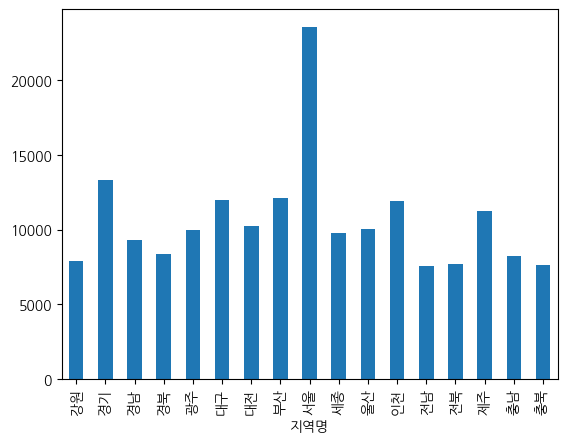

In [11]:
# 지역명X평균분양가격 의 평균 보려 할 때
price_2019, price_2019.groupby(['지역명'])['평당 분양가격'].mean().plot(kind='bar')


전용면적
전용면적102㎡초과         11517.705634
전용면적60㎡이하          10375.137421
전용면적60㎡초과85㎡이하     10271.040071
전용면적85㎡초과102㎡이하    11097.599573
전체                 10276.086207
Name: 평당 분양가격, dtype: float64


(     지역명    연도   월  분양가격(미터제곱)  평당 분양가격             전용면적
 0     서울  2015  10      5841.0  19275.3               전체
 1     서울  2015  10      5652.0  18651.6        전용면적60㎡이하
 2     서울  2015  10      5882.0  19410.6   전용면적60㎡초과85㎡이하
 3     서울  2015  10      5721.0  18879.3  전용면적85㎡초과102㎡이하
 4     서울  2015  10      5879.0  19400.7       전용면적102㎡초과
 ...   ..   ...  ..         ...      ...              ...
 4330  제주  2019  12      3882.0  12810.6               전체
 4331  제주  2019  12         NaN      NaN        전용면적60㎡이하
 4332  제주  2019  12      3898.0  12863.4   전용면적60㎡초과85㎡이하
 4333  제주  2019  12         NaN      NaN  전용면적85㎡초과102㎡이하
 4334  제주  2019  12      3601.0  11883.3       전용면적102㎡초과
 
 [4335 rows x 6 columns],
 <AxesSubplot:xlabel='전용면적'>)

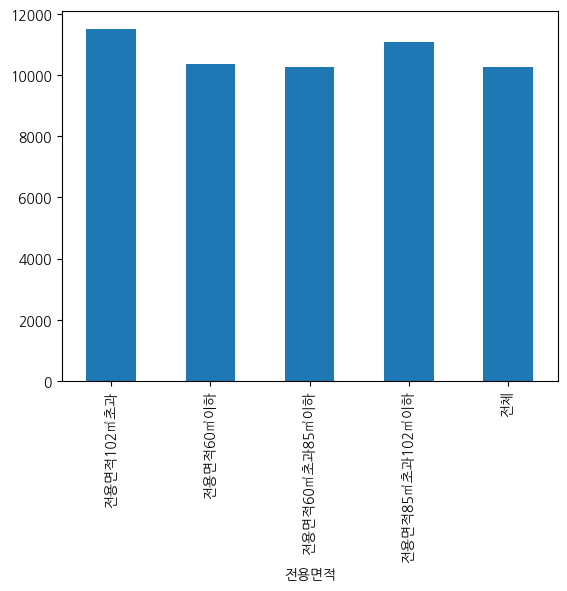

In [12]:
# 전용면적별 평균 분양가격

print(price_2019.groupby(['전용면적'])['평당 분양가격'].mean())
price_2019, price_2019.groupby(['전용면적'])['평당 분양가격'].mean().plot(kind='bar')

In [13]:
data = price_2019.groupby(['전용면적','지역명'])['평당 분양가격'].mean().reset_index()

(          전용면적 지역명  평당 분양가격
 0   전용면적102㎡초과  강원   8311.0
 1   전용면적102㎡초과  경기  14772.0
 2   전용면적102㎡초과  경남  10358.0
 3   전용면적102㎡초과  경북   9157.0
 4   전용면적102㎡초과  광주  11042.0
 ..         ...  ..      ...
 80          전체  전남   7284.0
 81          전체  전북   7293.0
 82          전체  제주  10785.0
 83          전체  충남   7815.0
 84          전체  충북   7219.0
 
 [85 rows x 3 columns],
 <AxesSubplot:>)

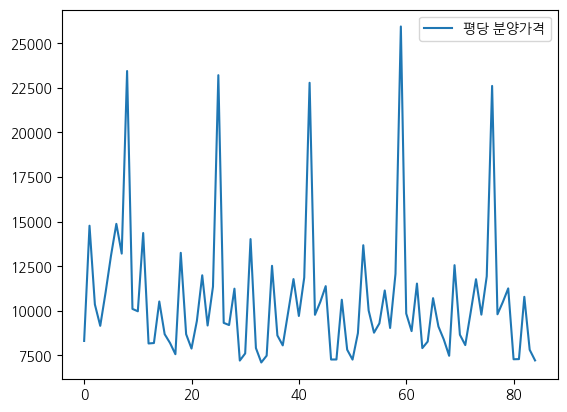

In [14]:
data.round(0), data.plot()

<AxesSubplot:ylabel='전용면적,지역명'>

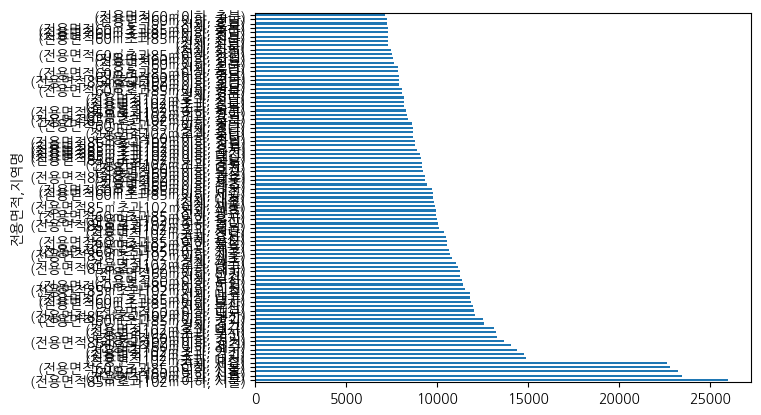

In [15]:
price_2019.groupby(['전용면적','지역명'])['평당 분양가격'].mean().sort_values(ascending=False).plot(kind='barh')

In [16]:
pd.pivot_table(price_2019, index=['전용면적', '지역명'], values=['평당 분양가격']).reset_index().round(0)

,전용면적,지역명,평당 분양가격
0,전용면적102㎡초과,강원,8311.0
1,전용면적102㎡초과,경기,14772.0
2,전용면적102㎡초과,경남,10358.0
3,전용면적102㎡초과,경북,9157.0
4,전용면적102㎡초과,광주,11042.0
...,...,...,...
80,전체,전남,7284.0
81,전체,전북,7293.0
82,전체,제주,10785.0
83,전체,충남,7815.0


<AxesSubplot:xlabel='전용면적'>

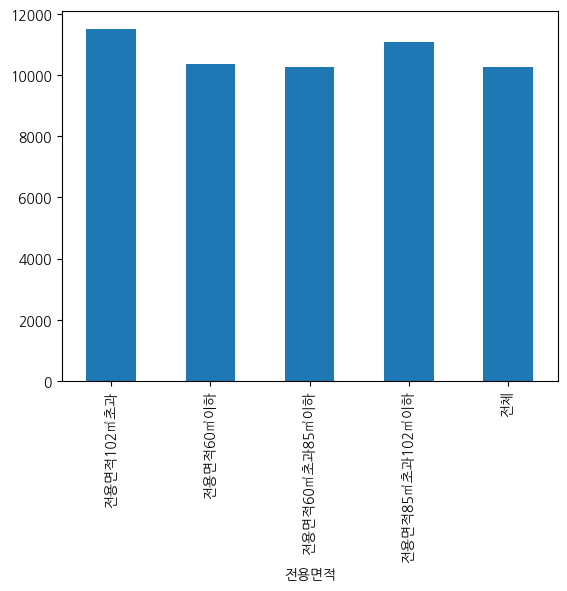

In [17]:
# 전용면적 별 분양가격
# index 값으로 정렬

price_2019.groupby(['전용면적'])['평당 분양가격'].mean().sort_index(ascending=True).plot(kind='bar')

<AxesSubplot:xlabel='전용면적'>

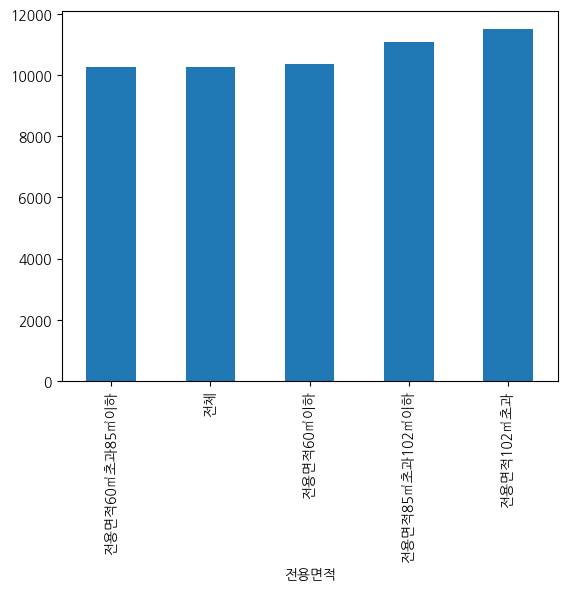

In [18]:
# 전용면적 별 분양가격
# value 값으로 정렬

price_2019.groupby(['전용면적'])['평당 분양가격'].mean().sort_values(ascending=True).plot(kind='bar')

<AxesSubplot:xlabel='연도'>

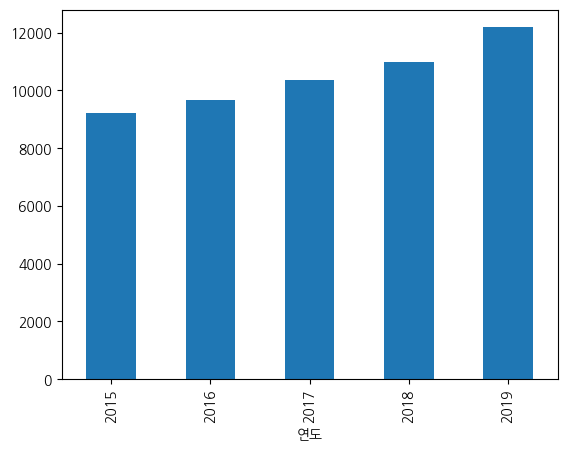

In [19]:
# 연도 별 분양가격
# index 값으로 정렬

price_2019.groupby(['연도'])['평당 분양가격'].mean().sort_index(ascending=True).plot(kind='bar')

<AxesSubplot:>

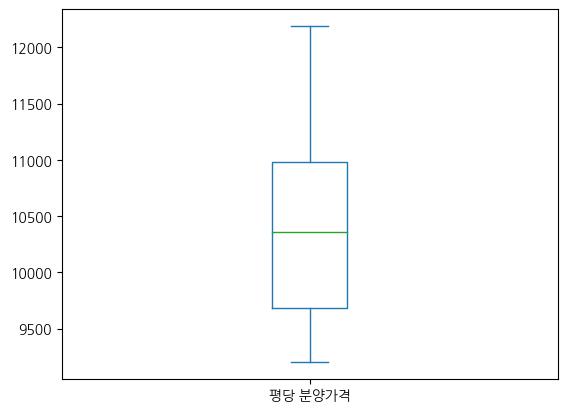

In [20]:
# BOXPLOT 그려보기
# Y축 : 분양가격 / X 축 : variable

data = price_2019.groupby(['연도'])['평당 분양가격'].mean()
data.plot(kind='box')

(연도         2015          2016          2017          2018          2019
 월                                                                      
 1           NaN   9334.029630  10095.132143  10719.148000  11535.540789
 2           NaN   9361.440000  10110.885714  10766.668000  11574.793421
 3           NaN   9423.276923  10107.428571  10905.488000  11610.094737
 4           NaN   9601.993902  10217.232143  10920.728571  11777.876000
 5           NaN   9602.396341  10358.819277  11087.485714  11976.394737
 6           NaN   9676.042683  10431.618072  10921.928571  12401.884000
 7           NaN   9700.551220  10549.536585  10868.376316  12424.852000
 8           NaN   9719.023171  10564.869512  10811.147368  12523.896000
 9           NaN   9737.656098  10583.601266  10915.257692  12527.571429
 10  9086.488889   9924.225882  10399.845570  11133.269231  12619.073077
 11  9218.122222   9972.757143           NaN  11224.762025  12647.785714
 12  9303.596296  10092.264286  10597.620000  11453

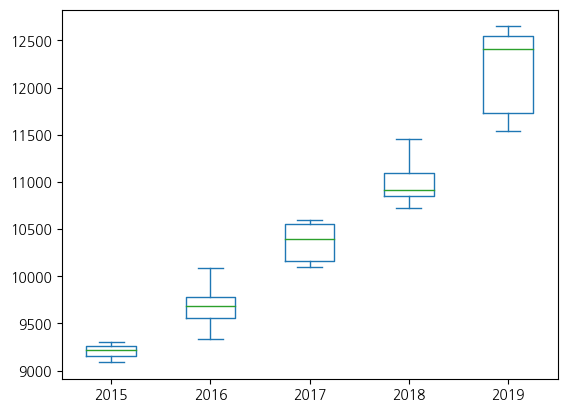

In [21]:
data = price_2019.pivot_table(index='월', columns='연도', values='평당 분양가격')
data, data.plot(kind='box')

<AxesSubplot:xlabel='연도', ylabel='평당 분양가격'>

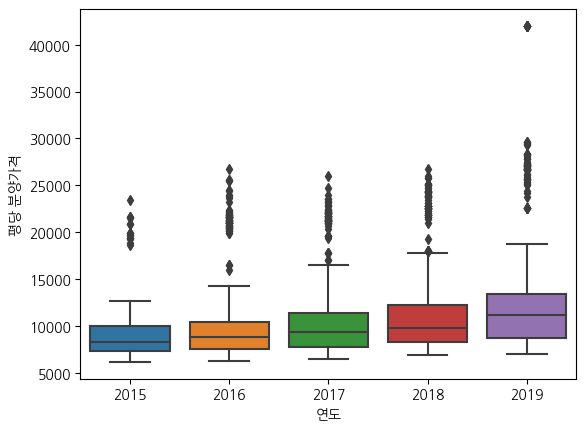

In [22]:
# seaborn 라이브러리로 시각화 해보기

import seaborn as sns
sns.boxplot(data=price_2019, x='연도', y='평당 분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당 분양가격'>

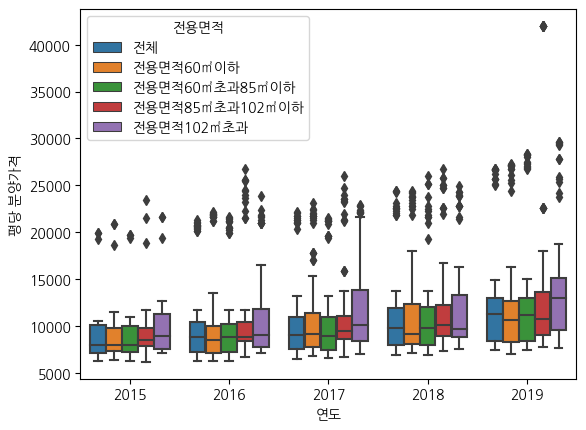

In [23]:
sns.boxplot(data=price_2019, x='연도', y='평당 분양가격', hue='전용면적')

<AxesSubplot:xlabel='연도', ylabel='평당 분양가격'>

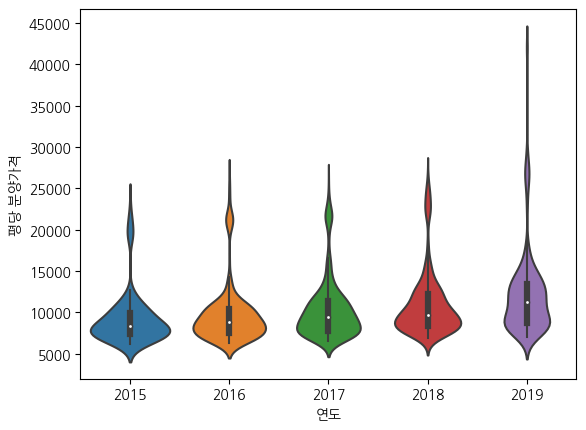

In [24]:
sns.violinplot(data=price_2019, x='연도', y='평당 분양가격')

## price_2015 파일 분석 + 2019와 통합

In [25]:
price_2015.sample(5)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,...,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,...,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [26]:
#price_2015 melt 하기
price_2015_melt = price_2015.melt(id_vars='지역', var_name='기간', value_name='평당 분양가격')
price_2015_melt

,지역,기간,평당 분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [27]:
# 2015와 통합할 2019 살펴보기
price_2019.columns, price_2019.sample(5), price_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         4335 non-null   object 
 1   연도          4335 non-null   int64  
 2   월           4335 non-null   int64  
 3   분양가격(미터제곱)  3957 non-null   float64
 4   평당 분양가격     3957 non-null   float64
 5   전용면적        4335 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


(Index(['지역명', '연도', '월', '분양가격(미터제곱)', '평당 분양가격', '전용면적'], dtype='object'),
      지역명    연도   월  분양가격(미터제곱)  평당 분양가격            전용면적
 670   경남  2016   5      2381.0   7857.3              전체
 1221  대전  2016  12      2671.0   8814.3       전용면적60㎡이하
 2642  인천  2018   5      3567.0  11771.1  전용면적60㎡초과85㎡이하
 1629  경기  2017   5      4045.0  13348.5      전용면적102㎡초과
 2230  대구  2017  12      3561.0  11751.3              전체,
 None)

In [28]:
# 2015의 기간을 연도와 월로 나누기
price_2015_melt['연도'] = price_2015_melt['기간'].str.split('년').str.get(0).astype('int')
price_2015_melt['월'] = price_2015_melt['기간'].str.split('년').str.get(1).str.replace('월','').astype('int')
price_2015_melt.drop(columns = ['기간'])

# 칼럼명을 2019 파일과 동일하게 수정
price_2015_melt.columns = ['지역명', '기간', '평당 분양가격', '연도', '월']
price_2015_melt

,지역명,기간,평당 분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12
...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8
353,전남,2015년8월,6289,2015,8
354,경북,2015년8월,7037,2015,8
355,경남,2015년8월,7665,2015,8


In [29]:
# 2015와 2019 통합 전, 통합할 칼럼들을 지정
cols = ['지역명', '연도', '월', '평당 분양가격']

In [30]:
price_2019[price_2019['전용면적'] == '전체']

,지역명,연도,월,분양가격(미터제곱),평당 분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
5,인천,2015,10,3163.0,10437.9,전체
10,경기,2015,10,3138.0,10355.4,전체
15,부산,2015,10,3112.0,10269.6,전체
20,대구,2015,10,2682.0,8850.6,전체
...,...,...,...,...,...,...
4310,전북,2019,12,2468.0,8144.4,전체
4315,전남,2019,12,2452.0,8091.6,전체
4320,경북,2019,12,2914.0,9616.2,전체
4325,경남,2019,12,3063.0,10107.9,전체


In [32]:
data_last = price_2019.loc[price_2019['전용면적'] == '전체', cols]
price_2015 = price_2015_melt[cols]
result = pd.concat([price_2015,price_2019])